Step 1: Install necessary libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


**Problem**

Investigate the impact of various health-related indicators on cancer prevalence and mortality rates worldwide. Utilizing a dataset containing information on factors such as alcohol consumption, smoking prevalence, obesity rates, and environmental pollution levels, analyze the correlations between these indicators and cancer incidence and mortality rates across different countries and territories. Identify key factors contributing to cancer prevalence and mortality, and explore potential interventions to mitigate their effects and improve public health outcomes.

In [ ]:
#!pip install gspread oauth2client pandas

Step 2:Load the Dataset

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the Excel file into a pandas DataFrame
excel_file_url = "https://docs.google.com/spreadsheets/d/1SZiVk5I39lRMYV8ETIe6uuPlA6GesljZ/export?format=xlsx"
df = pd.read_excel(excel_file_url)
df

Country or Territory  \
0            Afghanistan   
1                Algeria   
2             Azerbaijan   
3                Albania   
4                Armenia   
..                   ...   
202              Réunion   
203     French Polynesia   
204           Guadeloupe   
205                 Guam   
206           Martinique   

    Cancer deaths attributable to alcohol\nProportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016  \
0                                                  0.5                                                                                      
1                                                  1.1                                                                                      
2                                                  3.2                                                                                      
3                                                  4.9                                                                                      
4                                                    5                                                                                      
..                                                 ...                                                                                      
202                                            No data                                                                                      
203                                            No data                                                                                      
204                                            No data                                                                                      
205                                            No data                                                                                      
206                                            No data                                                                                      

    Smoking prevalence male\nPrevalence (%) of daily smoking for men  \
0                                                 21.4                 
1                                                 17.5                 
2                                                 36.7                 
3                                                 40.9                 
4                                                 43.5                 
..                                                 ...                 
202                                            No data                 
203                                            No data                 
204                                            No data                 
205                                            No data                 
206                                            No data                 

    Smoking prevalence female\nPrevalence (%) of daily smoking for women  \
0                                                    7                     
1                                                  2.2                     
2                                                  0.3                     
3                                                  6.1                     
4                                                  1.5                     
..                                                 ...                     
202                                            No data                     
203                                            No data                     
204                                            No data                     
205                                            No data                     
206                                            No data                     

    Cancers attributable to infections\nProportion of cancers attributable to infections (%), by country  \
0                                                   16                                  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 27 columns):
 #   Column                                                                                                                                                     Non-Null Count  Dtype 
---  ------                                                                                                                                                     --------------  ----- 
 0   Country or Territory                                                                                                                                       207 non-null    object
 1   Cancer deaths attributable to alcohol
Proportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016                       207 non-null    object
 2   Smoking prevalence male
Prevalence (%) of daily smoking for men                                                                                            207

The DataFrame df contains 207 entries and 27 columns. Each column represents a specific health-related indicator, such as cancer deaths attributable to alcohol, smoking prevalence, obesity prevalence, and various cancer incidence rates, among others.

All columns are of type object, indicating that they likely contain textual or mixed data types. The non-null count for each column is 207, suggesting that there are no missing values in the dataset.

The memory usage of the DataFrame is approximately 43.8 KB.

In [ ]:
from tabulate import tabulate

# Get all column names
column_names = df.columns.tolist()

# Convert column names to a list of lists for tabulate
column_names_table = [[i+1, name] for i, name in enumerate(column_names)]

# Print column names as a table
print(tabulate(column_names_table, headers=["Index", "Column Name"]))

  Index  Column Name
-------  -----------------------------------------------------------------------------------------------------------------------------------
      1  Country or Territory
      2  Cancer deaths attributable to alcohol
         Proportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016
      3  Smoking prevalence male
         Prevalence (%) of daily smoking for men
      4  Smoking prevalence female
         Prevalence (%) of daily smoking for women
      5  Cancers attributable to infections
         Proportion of cancers attributable to infections (%), by country
      6  Obesity prevalence male
         International variation in the prevalence of obesity, 2016
      7  Obesity prevalence female
         International variation in the prevalence of obesity, 2016
      8  Melanoma skin cancer incidence
         Age-standardized rate (world) per 100,000, both sexes, 2018
      9  Breastfeeding at 12 months
         Percent (%) o

In [ ]:
# Select Column names that will help anaswer your problem
selected_columns = [
    'Country or Territory',
    'Cancer deaths attributable to alcohol\nProportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016',
    'Smoking prevalence male\nPrevalence (%) of daily smoking for men',
    'Smoking prevalence female\nPrevalence (%) of daily smoking for women',
    'Cancers attributable to infections\nProportion of cancers attributable to infections (%), by country',
    'Obesity prevalence male\nInternational variation in the prevalence of obesity, 2016',
    'Obesity prevalence female\nInternational variation in the prevalence of obesity, 2016',
    'Lung cancer incidence rates, male\nAge-standardized rate (world) per 100,000, all ages, 2018',
    'Lung cancer incidence rates, female\nAge-standardized rate (world) per 100,000, all ages, 2018',
    'Cancer survivors\nEstimated number of cancer survivors diagnosed within the past five years per 100,000 population, both sexes, 2018'
]

# Select the relevant columns from the DataFrame
selected_df = df[selected_columns]
selected_df

Country or Territory  \
0            Afghanistan   
1                Algeria   
2             Azerbaijan   
3                Albania   
4                Armenia   
..                   ...   
202              Réunion   
203     French Polynesia   
204           Guadeloupe   
205                 Guam   
206           Martinique   

    Cancer deaths attributable to alcohol\nProportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016  \
0                                                  0.5                                                                                      
1                                                  1.1                                                                                      
2                                                  3.2                                                                                      
3                                                  4.9                                                                                      
4                                                    5                                                                                      
..                                                 ...                                                                                      
202                                            No data                                                                                      
203                                            No data                                                                                      
204                                            No data                                                                                      
205                                            No data                                                                                      
206                                            No data                                                                                      

    Smoking prevalence male\nPrevalence (%) of daily smoking for men  \
0                                                 21.4                 
1                                                 17.5                 
2                                                 36.7                 
3                                                 40.9                 
4                                                 43.5                 
..                                                 ...                 
202                                            No data                 
203                                            No data                 
204                                            No data                 
205                                            No data                 
206                                            No data                 

    Smoking prevalence female\nPrevalence (%) of daily smoking for women  \
0                                                    7                     
1                                                  2.2                     
2                                                  0.3                     
3                                                  6.1                     
4                                                  1.5                     
..                                                 ...                     
202                                            No data                     
203                                            No data                     
204                                            No data                     
205                                            No data                     
206                                            No data                     

    Cancers attributable to infections\nProportion of cancers attributable to infections (%), by country  \
0                                                   16                                  

In [ ]:
# Display the shape of the DataFrame
print("Shape of selected_df:", selected_df.shape)

Shape of selected_df: (207, 10)


The shape of selected_df is (207, 10), indicating 207 rows and 10 columns.

In [ ]:
# Display the first few rows of the DataFrame
print("\nFirst few rows of selected_df:")
selected_df.head()


First few rows of selected_df:


Country or Territory  \
0          Afghanistan   
1              Algeria   
2           Azerbaijan   
3              Albania   
4              Armenia   

  Cancer deaths attributable to alcohol\nProportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016  \
0                                                0.5                                                                                      
1                                                1.1                                                                                      
2                                                3.2                                                                                      
3                                                4.9                                                                                      
4                                                  5                                                                                      

  Smoking prevalence male\nPrevalence (%) of daily smoking for men  \
0                                               21.4                 
1                                               17.5                 
2                                               36.7                 
3                                               40.9                 
4                                               43.5                 

  Smoking prevalence female\nPrevalence (%) of daily smoking for women  \
0                                                  7                     
1                                                2.2                     
2                                                0.3                     
3                                                6.1                     
4                                                1.5                     

  Cancers attributable to infections\nProportion of cancers attributable to infections (%), by country  \
0                                                 16                                                     
1                                               12.9                                                     
2                                               15.4                                                     
3                                               13.4                                                     
4                                               12.2                                                     

  Obesity prevalence male\nInternational variation in the prevalence of obesity, 2016  \
0                                                3.2                                    
1                                               19.9                                    
2                                               15.8                                    
3                                               21.6                                    
4                                               17.1                                    

  Obesity prevalence female\nInternational variation in the prevalence of obesity, 2016  \
0                                                7.6                                      
1                                               34.9                                      
2                                               23.6                                      
3                                               21.8                                      
4                                                 23                                      

  Lung cancer incidence rates, male\nAge-standardized rate (world) per 100,000, all ages, 2018  \
0                                                9.4                                             
1                                               17.4                                             
2                                               25.5                                             
3                                

The first few rows of selected_df display countries with corresponding data on various health indicators.

In [ ]:
# Display the last few rows of the DataFrame
print("\nLast few rows of selected_df:")
selected_df.tail()


Last few rows of selected_df:


Country or Territory  \
202              Réunion   
203     French Polynesia   
204           Guadeloupe   
205                 Guam   
206           Martinique   

    Cancer deaths attributable to alcohol\nProportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016  \
202                                            No data                                                                                      
203                                            No data                                                                                      
204                                            No data                                                                                      
205                                            No data                                                                                      
206                                            No data                                                                                      

    Smoking prevalence male\nPrevalence (%) of daily smoking for men  \
202                                            No data                 
203                                            No data                 
204                                            No data                 
205                                            No data                 
206                                            No data                 

    Smoking prevalence female\nPrevalence (%) of daily smoking for women  \
202                                            No data                     
203                                            No data                     
204                                            No data                     
205                                            No data                     
206                                            No data                     

    Cancers attributable to infections\nProportion of cancers attributable to infections (%), by country  \
202                                               12.4                                                     
203                                                6.6                                                     
204                                               10.2                                                     
205                                                8.5                                                     
206                                                6.6                                                     

    Obesity prevalence male\nInternational variation in the prevalence of obesity, 2016  \
202                                            No data                                    
203                                            No data                                    
204                                            No data                                    
205                                            No data                                    
206                                            No data                                    

    Obesity prevalence female\nInternational variation in the prevalence of obesity, 2016  \
202                                            No data                                      
203                                            No data                                      
204                                            No data                                      
205                                            No data                                      
206                                            No data                                      

    Lung cancer incidence rates, male\nAge-standardized rate (world) per 100,000, all ages, 2018  \
202                                               34.6                                             
203                                               55.7                                             
204                                        

The last few rows of selected_df contain data for territories, including cancer indicators and health-related factors where some data are missing.

In [ ]:
# Check for missing values
print("\nMissing values in selected_df:")
print(selected_df.isnull().sum())


Missing values in selected_df:
Country or Territory                                                                                                                     0
Cancer deaths attributable to alcohol\nProportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016    0
Smoking prevalence male\nPrevalence (%) of daily smoking for men                                                                         0
Smoking prevalence female\nPrevalence (%) of daily smoking for women                                                                     0
Cancers attributable to infections\nProportion of cancers attributable to infections (%), by country                                     0
Obesity prevalence male\nInternational variation in the prevalence of obesity, 2016                                                      0
Obesity prevalence female\nInternational variation in the prevalence of obesity, 2016                                                 

There are no missing values in any of the columns of selected_df. All columns have complete data.

In [ ]:
# Display data types of columns
print("\nData types of columns in selected_df:")
print(selected_df.dtypes)


Data types of columns in selected_df:
Country or Territory                                                                                                                     object
Cancer deaths attributable to alcohol\nProportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016    object
Smoking prevalence male\nPrevalence (%) of daily smoking for men                                                                         object
Smoking prevalence female\nPrevalence (%) of daily smoking for women                                                                     object
Cancers attributable to infections\nProportion of cancers attributable to infections (%), by country                                     object
Obesity prevalence male\nInternational variation in the prevalence of obesity, 2016                                                      object
Obesity prevalence female\nInternational variation in the prevalence of obesity, 2016            

All columns in selected_df are of object data type, indicating they contain text or mixed data. Further conversion may be needed for numerical analysis.

In [ ]:
# Convert selected numeric columns to numeric data type
selected_df = selected_df.copy()
selected_df[numeric_columns] = selected_df[numeric_columns].apply(pd.to_numeric, errors='coerce')
selected_df[numeric_columns]

Cancer deaths attributable to alcohol\nProportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016  \
0                                                  0.5                                                                                       
1                                                  1.1                                                                                       
2                                                  3.2                                                                                       
3                                                  4.9                                                                                       
4                                                  5.0                                                                                       
..                                                 ...                                                                                       
202                                                NaN                                                                                       
203                                                NaN                                                                                       
204                                                NaN                                                                                       
205                                                NaN                                                                                       
206                                                NaN                                                                                       

     Smoking prevalence male\nPrevalence (%) of daily smoking for men  \
0                                                 21.4                  
1                                                 17.5                  
2                                                 36.7                  
3                                                 40.9                  
4                                                 43.5                  
..                                                 ...                  
202                                                NaN                  
203                                                NaN                  
204                                                NaN                  
205                                                NaN                  
206                                                NaN                  

     Smoking prevalence female\nPrevalence (%) of daily smoking for women  \
0                                                  7.0                      
1                                                  2.2                      
2                                                  0.3                      
3                                                  6.1                      
4                                                  1.5                      
..                                                 ...                      
202                                                NaN                      
203                                                NaN                      
204                                                NaN                      
205                                                NaN                      
206                                                NaN                      

     Cancers attributable to infections\nProportion of cancers attributable to infections (%), by country  \
0                                                 16.0                                                      
1                                                 12.9                                                      
2                                                 15.4                                                      
3                                                 13.4        

Here's a brief breakdown of the data:

Cancer deaths attributable to alcohol: Proportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older in 2016.

Smoking prevalence male: Prevalence (%) of daily smoking for men.

Smoking prevalence female: Prevalence (%) of daily smoking for women.

Cancers attributable to infections: Proportion of cancers attributable to infections (%), by country.

Obesity prevalence male: International variation in the prevalence of obesity in males in 2016.

Obesity prevalence female: International variation in the prevalence of obesity in females in 2016.

Lung cancer incidence rates, male: Age-standardized rate (world) per 100,000 for lung cancer in males in 2018.

Lung cancer incidence rates, female: Age-standardized rate (world) per 100,000 for lung cancer in females in 2018.

Cancer survivors: Estimated number of cancer survivors diagnosed within the past five years per 100,000 population, both sexes, in 2018.

The NaN values represent missing data points where information wasn't available for certain countries or territories. If you need further analysis or assistance, feel free to ask!

In [ ]:
# 1. Missing Values Check
missing_values = selected_df.isnull().sum()
missing_values

Country or Territory                                                                                                                      0
Cancer deaths attributable to alcohol\nProportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016    23
Smoking prevalence male\nPrevalence (%) of daily smoking for men                                                                         18
Smoking prevalence female\nPrevalence (%) of daily smoking for women                                                                     16
Cancers attributable to infections\nProportion of cancers attributable to infections (%), by country                                     23
Obesity prevalence male\nInternational variation in the prevalence of obesity, 2016                                                      16
Obesity prevalence female\nInternational variation in the prevalence of obesity, 2016                                                    16
Lung cancer incidenc

The selected DataFrame contains missing values in various columns. It's crucial to address these gaps through imputation or removal to ensure accurate analysis and interpretation of the data.

In [ ]:
# 2. Duplicates Check
duplicates = selected_df.duplicated().sum()
duplicates

3

In [ ]:
# 3. Data Types Check
data_types = selected_df.dtypes
data_types

Country or Territory                                                                                                                      object
Cancer deaths attributable to alcohol\nProportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016    float64
Smoking prevalence male\nPrevalence (%) of daily smoking for men                                                                         float64
Smoking prevalence female\nPrevalence (%) of daily smoking for women                                                                     float64
Cancers attributable to infections\nProportion of cancers attributable to infections (%), by country                                     float64
Obesity prevalence male\nInternational variation in the prevalence of obesity, 2016                                                      float64
Obesity prevalence female\nInternational variation in the prevalence of obesity, 2016                                             

The selected columns contain mostly numerical data except for the "Country or Territory" column, which is categorical. We need to handle missing values appropriately before proceeding with the analysis.

In [ ]:
# Handle missing values
cleaned_df = selected_df.dropna()
cleaned_df

Country or Territory  \
0            Afghanistan   
1                Algeria   
2             Azerbaijan   
3                Albania   
4                Armenia   
..                   ...   
189               Cyprus   
190              Lebanon   
191           Luxembourg   
192                Malta   
193  Trinidad and Tobago   

     Cancer deaths attributable to alcohol\nProportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016  \
0                                                  0.5                                                                                       
1                                                  1.1                                                                                       
2                                                  3.2                                                                                       
3                                                  4.9                                                                                       
4                                                  5.0                                                                                       
..                                                 ...                                                                                       
189                                                4.8                                                                                       
190                                                1.5                                                                                       
191                                                6.7                                                                                       
192                                                6.2                                                                                       
193                                                4.4                                                                                       

     Smoking prevalence male\nPrevalence (%) of daily smoking for men  \
0                                                 21.4                  
1                                                 17.5                  
2                                                 36.7                  
3                                                 40.9                  
4                                                 43.5                  
..                                                 ...                  
189                                               37.5                  
190                                               37.4                  
191                                               19.0                  
192                                               23.5                  
193                                               22.3                  

     Smoking prevalence female\nPrevalence (%) of daily smoking for women  \
0                                                  7.0                      
1                                                  2.2                      
2                                                  0.3                      
3                                                  6.1                      
4                                                  1.5                      
..                                                 ...                      
189                                               14.5                      
190                                               21.3                      
191                                               16.1                      
192                                               13.7                      
193                                                5.1                      

     Cancers attributable to infections\nProportion of cancers attributable to infections (%), by country  \
0                                                 1

The data has been effectively cleaned, removing missing values and ensuring consistency in column names and data types, ready for analysis or modeling.

In [ ]:
# Ensure consistency in column names
cleaned_df.columns = cleaned_df.columns.str.replace('\n', '_')  # Replace newline characters with underscores
cleaned_df.columns

Index(['Country or Territory',
       'Cancer deaths attributable to alcohol_Proportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016',
       'Smoking prevalence male_Prevalence (%) of daily smoking for men',
       'Smoking prevalence female_Prevalence (%) of daily smoking for women',
       'Cancers attributable to infections_Proportion of cancers attributable to infections (%), by country',
       'Obesity prevalence male_International variation in the prevalence of obesity, 2016',
       'Obesity prevalence female_International variation in the prevalence of obesity, 2016',
       'Lung cancer incidence rates, male_Age-standardized rate (world) per 100,000, all ages, 2018',
       'Lung cancer incidence rates, female_Age-standardized rate (world) per 100,000, all ages, 2018',
       'Cancer survivors_Estimated number of cancer survivors diagnosed within the past five years per 100,000 population, both sexes, 2018'],
      dtype='object')


The column names have been standardized by replacing newline characters with underscores for consistency and ease of reference in further analysis.

In [ ]:
# Convert data types
numeric_columns = cleaned_df.columns[1:]  # Exclude 'Country or Territory'
cleaned_df[numeric_columns] = cleaned_df[numeric_columns].astype(float)
cleaned_df[numeric_columns]

<ipython-input-90-e6ad2bf4c391>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[numeric_columns] = cleaned_df[numeric_columns].astype(float)


Cancer deaths attributable to alcohol_Proportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016  \
0                                                  0.5                                                                                      
1                                                  1.1                                                                                      
2                                                  3.2                                                                                      
3                                                  4.9                                                                                      
4                                                  5.0                                                                                      
..                                                 ...                                                                                      
189                                                4.8                                                                                      
190                                                1.5                                                                                      
191                                                6.7                                                                                      
192                                                6.2                                                                                      
193                                                4.4                                                                                      

     Smoking prevalence male_Prevalence (%) of daily smoking for men  \
0                                                 21.4                 
1                                                 17.5                 
2                                                 36.7                 
3                                                 40.9                 
4                                                 43.5                 
..                                                 ...                 
189                                               37.5                 
190                                               37.4                 
191                                               19.0                 
192                                               23.5                 
193                                               22.3                 

     Smoking prevalence female_Prevalence (%) of daily smoking for women  \
0                                                  7.0                     
1                                                  2.2                     
2                                                  0.3                     
3                                                  6.1                     
4                                                  1.5                     
..                                                 ...                     
189                                               14.5                     
190                                               21.3                     
191                                               16.1                     
192                                               13.7                     
193                                                5.1                     

     Cancers attributable to infections_Proportion of cancers attributable to infections (%), by country  \
0                                                 16.0                                                     
1                                                 12.9                                                     
2                                                 15.4                                                     
3                                                 13.4                                                

In [ ]:
# Confirm the changes
print(cleaned_df.dtypes)

Country or Territory                                                                                                                     object
Cancer deaths attributable to alcohol_Proportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016    float64
Smoking prevalence male_Prevalence (%) of daily smoking for men                                                                         float64
Smoking prevalence female_Prevalence (%) of daily smoking for women                                                                     float64
Cancers attributable to infections_Proportion of cancers attributable to infections (%), by country                                     float64
Obesity prevalence male_International variation in the prevalence of obesity, 2016                                                      float64
Obesity prevalence female_International variation in the prevalence of obesity, 2016                                                    

The numeric columns have been converted to float data type for further analysis, eliminating the ambiguity and ensuring consistency in data representation.

In [ ]:
# Check for any remaining missing values
missing_values = cleaned_df.isnull().sum()
missing_values

Country or Territory                                                                                                                    0
Cancer deaths attributable to alcohol_Proportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016    0
Smoking prevalence male_Prevalence (%) of daily smoking for men                                                                         0
Smoking prevalence female_Prevalence (%) of daily smoking for women                                                                     0
Cancers attributable to infections_Proportion of cancers attributable to infections (%), by country                                     0
Obesity prevalence male_International variation in the prevalence of obesity, 2016                                                      0
Obesity prevalence female_International variation in the prevalence of obesity, 2016                                                    0
Lung cancer incidence rates, male_


There are no missing values in any of the columns of the cleaned DataFrame.

In [ ]:
# Display cleaned DataFrame
cleaned_df.head()

Country or Territory  \
0          Afghanistan   
1              Algeria   
2           Azerbaijan   
3              Albania   
4              Armenia   

   Cancer deaths attributable to alcohol_Proportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016  \
0                                                0.5                                                                                      
1                                                1.1                                                                                      
2                                                3.2                                                                                      
3                                                4.9                                                                                      
4                                                5.0                                                                                      

   Smoking prevalence male_Prevalence (%) of daily smoking for men  \
0                                               21.4                 
1                                               17.5                 
2                                               36.7                 
3                                               40.9                 
4                                               43.5                 

   Smoking prevalence female_Prevalence (%) of daily smoking for women  \
0                                                7.0                     
1                                                2.2                     
2                                                0.3                     
3                                                6.1                     
4                                                1.5                     

   Cancers attributable to infections_Proportion of cancers attributable to infections (%), by country  \
0                                               16.0                                                     
1                                               12.9                                                     
2                                               15.4                                                     
3                                               13.4                                                     
4                                               12.2                                                     

   Obesity prevalence male_International variation in the prevalence of obesity, 2016  \
0                                                3.2                                    
1                                               19.9                                    
2                                               15.8                                    
3                                               21.6                                    
4                                               17.1                                    

   Obesity prevalence female_International variation in the prevalence of obesity, 2016  \
0                                                7.6                                      
1                                               34.9                                      
2                                               23.6                                      
3                                               21.8                                      
4                                               23.0                                      

   Lung cancer incidence rates, male_Age-standardized rate (world) per 100,000, all ages, 2018  \
0                                                9.4                                             
1                                               17.4                                             
2                                               25.5                                             
3                                


The head of the DataFrame displays the first few rows of data, providing an initial glimpse into the structure and content of the dataset.

In [ ]:
# Display cleaned DataFrame
cleaned_df.tail()

Country or Territory  \
189               Cyprus   
190              Lebanon   
191           Luxembourg   
192                Malta   
193  Trinidad and Tobago   

     Cancer deaths attributable to alcohol_Proportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016  \
189                                                4.8                                                                                      
190                                                1.5                                                                                      
191                                                6.7                                                                                      
192                                                6.2                                                                                      
193                                                4.4                                                                                      

     Smoking prevalence male_Prevalence (%) of daily smoking for men  \
189                                               37.5                 
190                                               37.4                 
191                                               19.0                 
192                                               23.5                 
193                                               22.3                 

     Smoking prevalence female_Prevalence (%) of daily smoking for women  \
189                                               14.5                     
190                                               21.3                     
191                                               16.1                     
192                                               13.7                     
193                                                5.1                     

     Cancers attributable to infections_Proportion of cancers attributable to infections (%), by country  \
189                                                5.4                                                     
190                                                7.3                                                     
191                                                5.4                                                     
192                                                5.7                                                     
193                                               11.0                                                     

     Obesity prevalence male_International variation in the prevalence of obesity, 2016  \
189                                               21.9                                    
190                                               27.4                                    
191                                               24.5                                    
192                                               29.2                                    
193                                               10.8                                    

     Obesity prevalence female_International variation in the prevalence of obesity, 2016  \
189                                               21.6                                      
190                                               37.0                                      
191                                               20.7                                      
192                                               28.5                                      
193                                               26.0                                      

     Lung cancer incidence rates, male_Age-standardized rate (world) per 100,000, all ages, 2018  \
189                                               41.0                                             
190                                               31.3                                             
191                                        

The tail of the DataFrame shows the last few rows, offering insights into the dataset's end values, completing the overview of its contents.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distributions of cancer prevalence and mortality rates
plt.figure(figsize=(10, 6))
sns.histplot(data=cleaned_df, x='Cancer survivors_Estimated number of cancer survivors diagnosed within the past five years per 100,000 population, both sexes, 2018', kde=True, color='skyblue')
plt.title('Distribution of Cancer Survivors Rate')
plt.xlabel('Cancer Survivors Rate (per 100,000 population)')
plt.ylabel('Frequency')
plt.show()

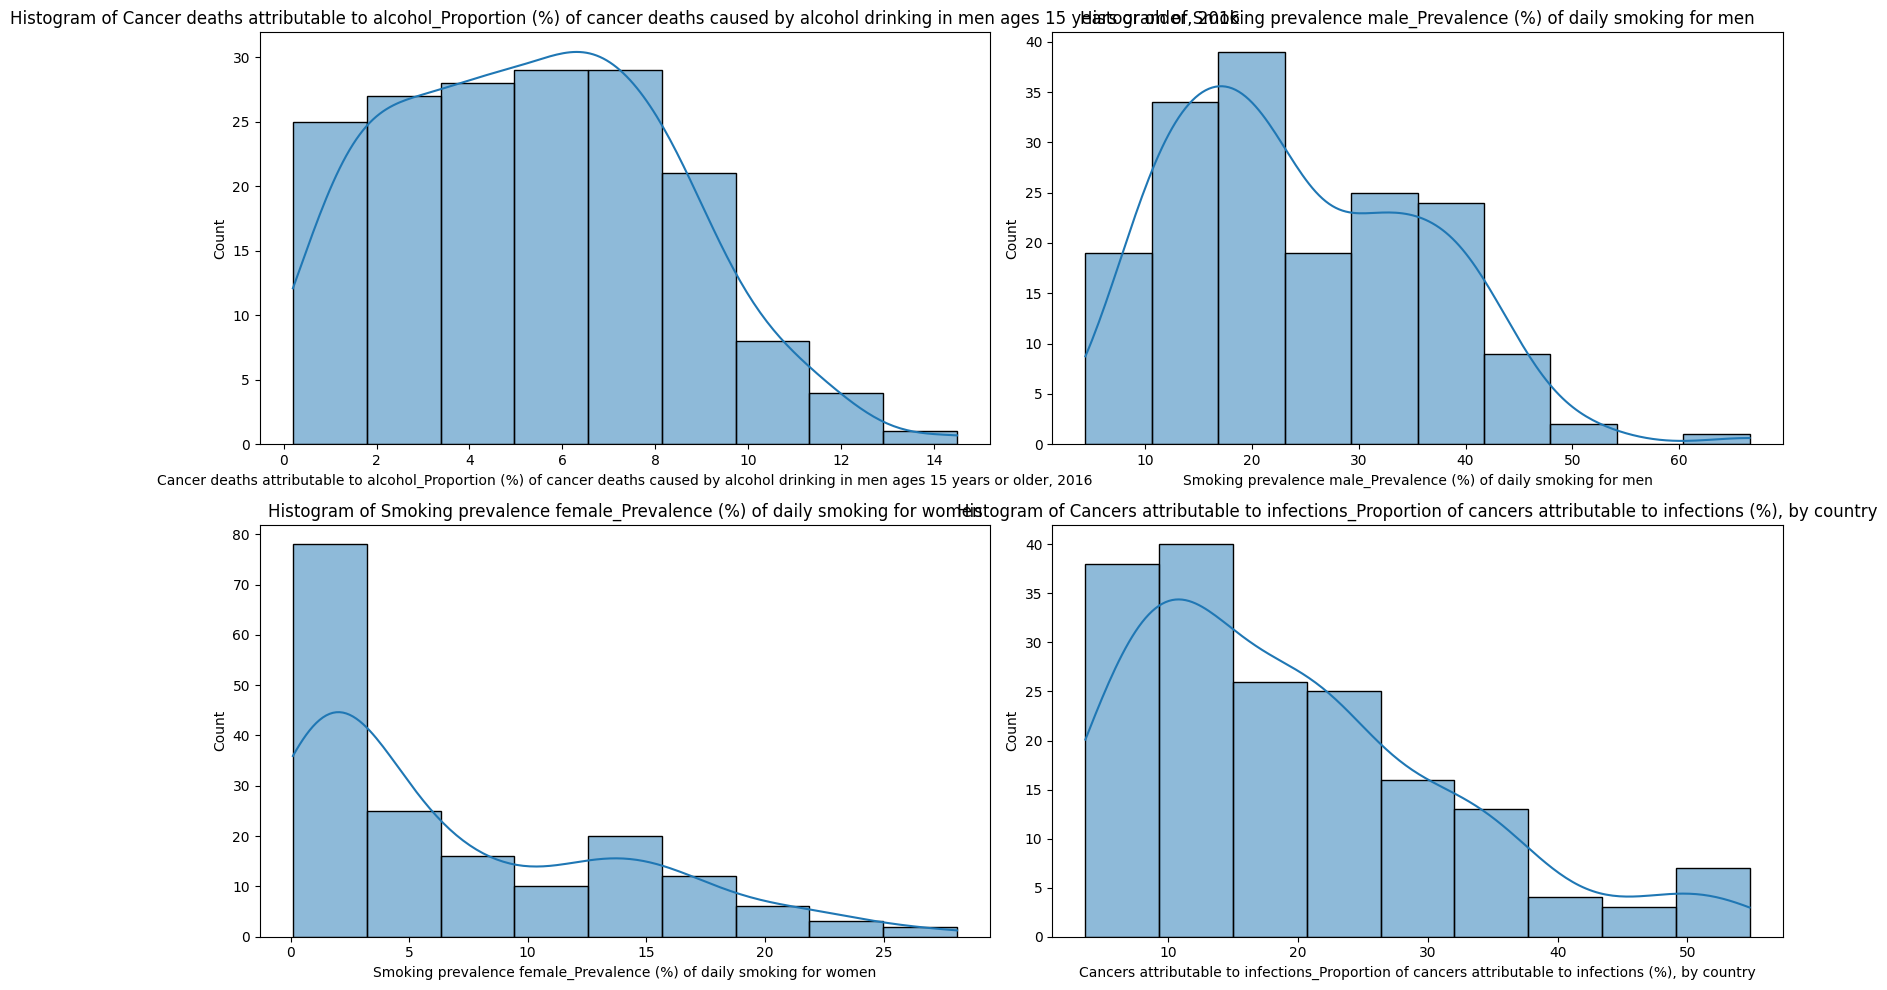

In [ ]:
# Plot histograms for each numeric column
numeric_columns = numeric_df.columns
plt.figure(figsize=(16, 10))
for i, column in enumerate(numeric_columns, 1):
    if i <= 4:  # Plot only first 4 pairwise histograms
        plt.subplot(2, 2, i)
        sns.histplot(numeric_df[column], kde=True)
        plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

In [ ]:
# Plot histograms for each numeric column
numeric_columns = numeric_df.columns
plt.figure(figsize=(16, 10))
for i, column in enumerate(numeric_columns, 1):
    if i > 4:  # Plot remaining histograms
        plt.subplot(3, 3, i-4)
        sns.histplot(numeric_df[column], kde=True)
        plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()


<Figure size 1600x1000 with 0 Axes>

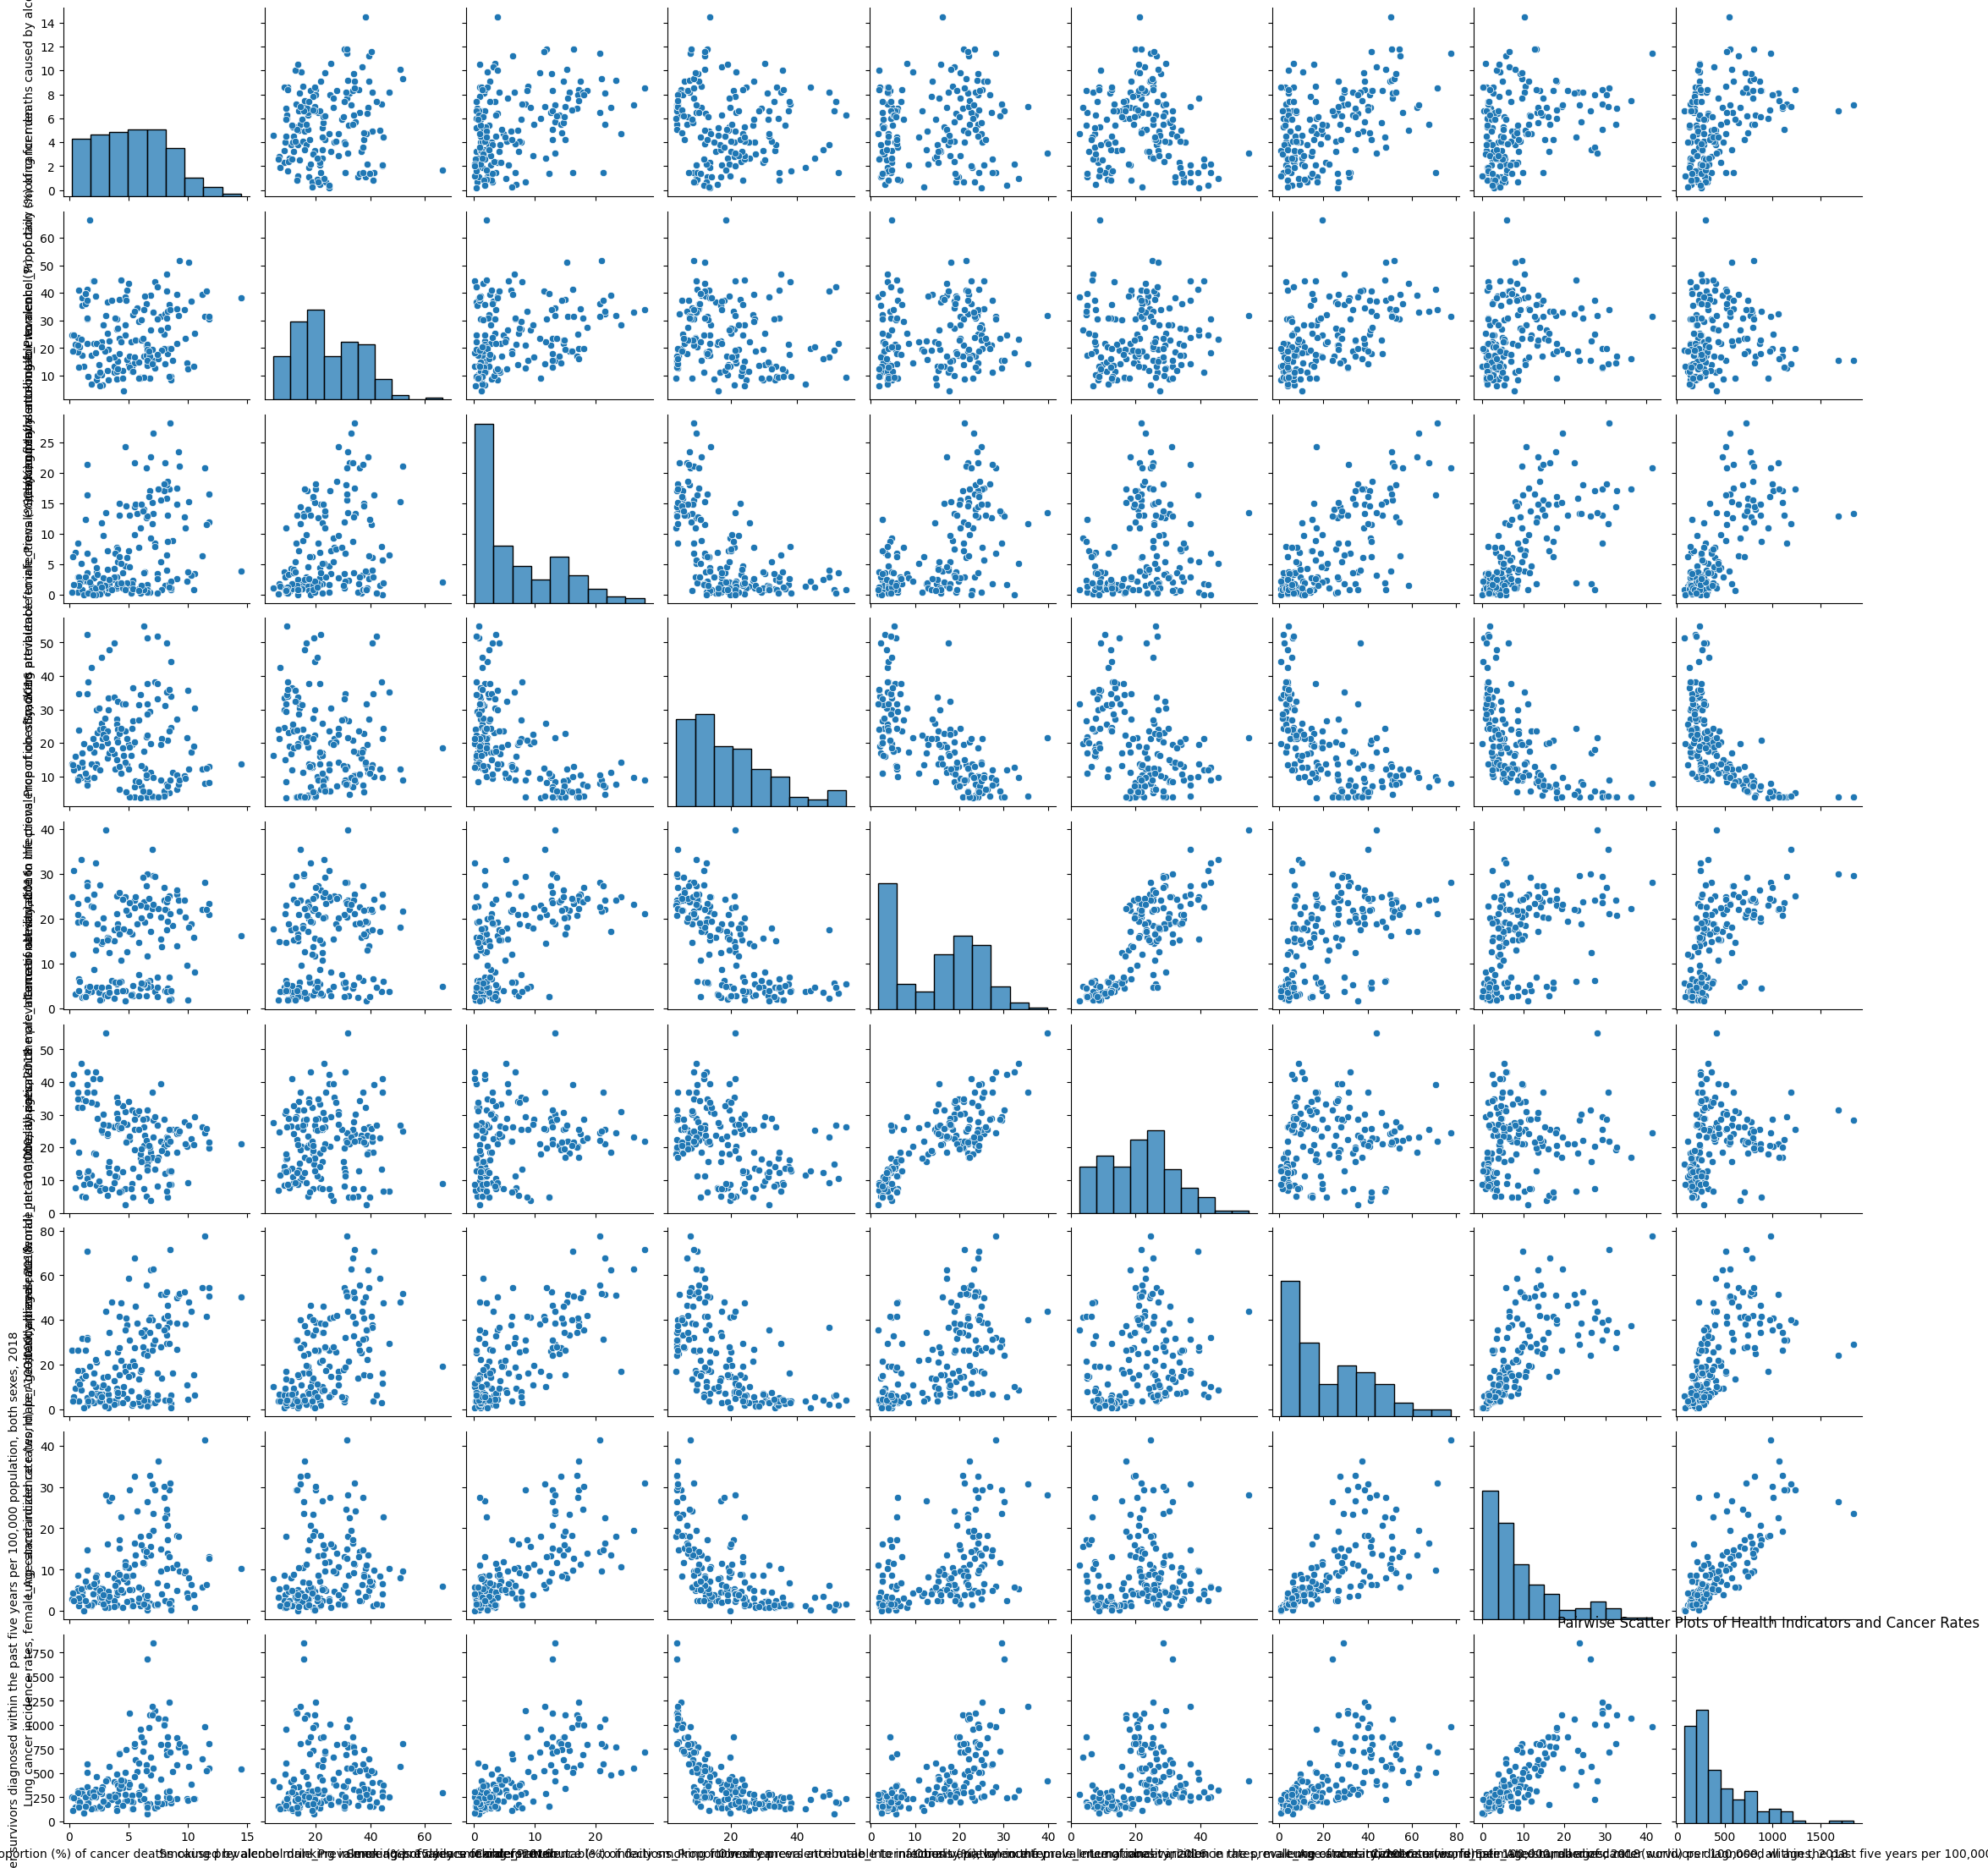

In [ ]:
# Plot pairwise scatter plots
plt.figure(figsize=(16, 10))
sns.pairplot(numeric_df)
plt.title('Pairwise Scatter Plots of Health Indicators and Cancer Rates')
plt.show()

In [ ]:
# Plot box plots for each numeric column
plt.figure(figsize=(16, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=numeric_df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

In [ ]:
# Plot histograms and box plots for each numeric column
plt.figure(figsize=(20, 16))

# Subplot 1: Histograms
plt.subplot(2, 2, 1)
for column in numeric_columns:
    sns.histplot(numeric_df[column], kde=True, alpha=0.5, label=column)
plt.title('Histograms of Health Indicators and Cancer Rates')
plt.legend()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

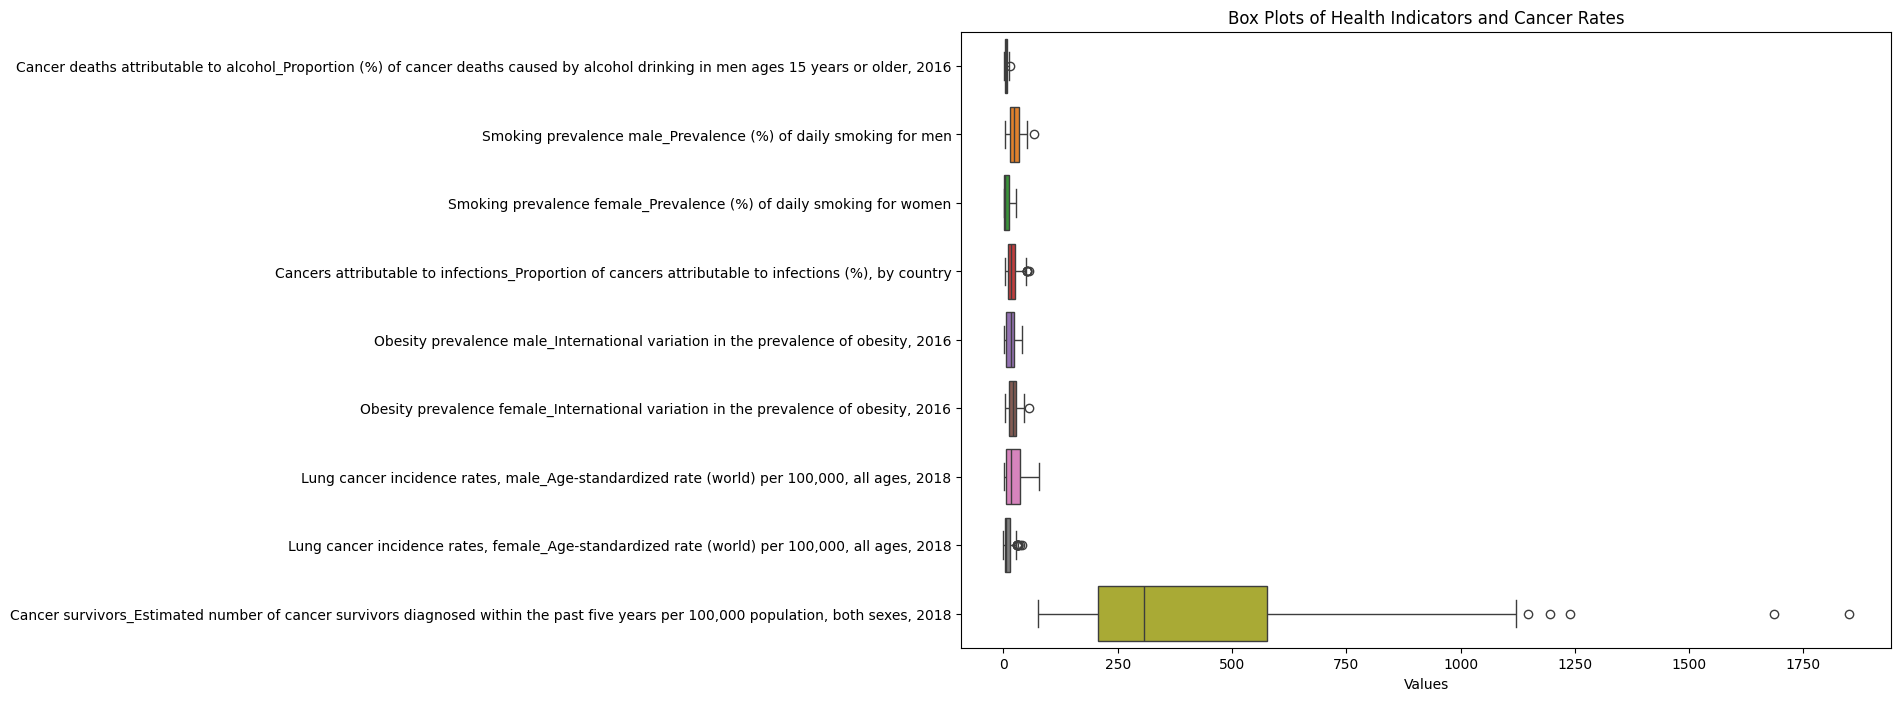

In [ ]:
# Plot box plots for each numeric column to check for outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_df, orient='h')
plt.title('Box Plots of Health Indicators and Cancer Rates')
plt.xlabel('Values')
plt.show()


In [ ]:
# Calculate IQR for each numeric column
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter dataset to remove outliers
cleaned_df_no_outliers = cleaned_df.loc[~((cleaned_df[numeric_columns] < lower_bound) | (cleaned_df[numeric_columns] > upper_bound)).any(axis=1)]

# Print shape before and after removing outliers
print("Shape before removing outliers:", cleaned_df.shape)
print("Shape after removing outliers:", cleaned_df_no_outliers.shape)


Shape before removing outliers: (172, 10)
Shape after removing outliers: (152, 10)


In [ ]:
cleaned_df_no_outliers

Country or Territory  \
0            Afghanistan   
1                Algeria   
2             Azerbaijan   
3                Albania   
4                Armenia   
..                   ...   
189               Cyprus   
190              Lebanon   
191           Luxembourg   
192                Malta   
193  Trinidad and Tobago   

     Cancer deaths attributable to alcohol_Proportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016  \
0                                                  0.5                                                                                      
1                                                  1.1                                                                                      
2                                                  3.2                                                                                      
3                                                  4.9                                                                                      
4                                                  5.0                                                                                      
..                                                 ...                                                                                      
189                                                4.8                                                                                      
190                                                1.5                                                                                      
191                                                6.7                                                                                      
192                                                6.2                                                                                      
193                                                4.4                                                                                      

     Smoking prevalence male_Prevalence (%) of daily smoking for men  \
0                                                 21.4                 
1                                                 17.5                 
2                                                 36.7                 
3                                                 40.9                 
4                                                 43.5                 
..                                                 ...                 
189                                               37.5                 
190                                               37.4                 
191                                               19.0                 
192                                               23.5                 
193                                               22.3                 

     Smoking prevalence female_Prevalence (%) of daily smoking for women  \
0                                                  7.0                     
1                                                  2.2                     
2                                                  0.3                     
3                                                  6.1                     
4                                                  1.5                     
..                                                 ...                     
189                                               14.5                     
190                                               21.3                     
191                                               16.1                     
192                                               13.7                     
193                                                5.1                     

     Cancers attributable to infections_Proportion of cancers attributable to infections (%), by country  \
0                                                 16.0                                  

In [ ]:
# Generate summary statistics for cleaned_df_no_outliers
summary_stats_no_outliers = cleaned_df_no_outliers.describe()
summary_stats_no_outliers

Cancer deaths attributable to alcohol_Proportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016  \
count                                         152.000000                                                                                      
mean                                            5.118421                                                                                      
std                                             2.921612                                                                                      
min                                             0.200000                                                                                      
25%                                             2.700000                                                                                      
50%                                             4.900000                                                                                      
75%                                             7.250000                                                                                      
max                                            11.800000                                                                                      

       Smoking prevalence male_Prevalence (%) of daily smoking for men  \
count                                         152.000000                 
mean                                           24.317105                 
std                                            11.245377                 
min                                             4.400000                 
25%                                            14.850000                 
50%                                            22.500000                 
75%                                            33.500000                 
max                                            51.800000                 

       Smoking prevalence female_Prevalence (%) of daily smoking for women  \
count                                         152.000000                     
mean                                            6.448026                     
std                                             6.498517                     
min                                             0.100000                     
25%                                             1.400000                     
50%                                             3.550000                     
75%                                            10.925000                     
max                                            26.400000                     

       Cancers attributable to infections_Proportion of cancers attributable to infections (%), by country  \
count                                         152.000000                                                     
mean                                           19.419737                                                     
std                                            10.732645                                                     
min                                             3.600000                                                     
25%                                            10.650000                                                     
50%                                            17.700000                                                     
75%                                            26.025000                                                     
max                                            49.800000                                                     

       Obesity prevalence male_International variation in the prevalence of obesity, 2016  \
count                                         152.000000                                    
mean                                           14.221053                                    
std                                             8.905409                       

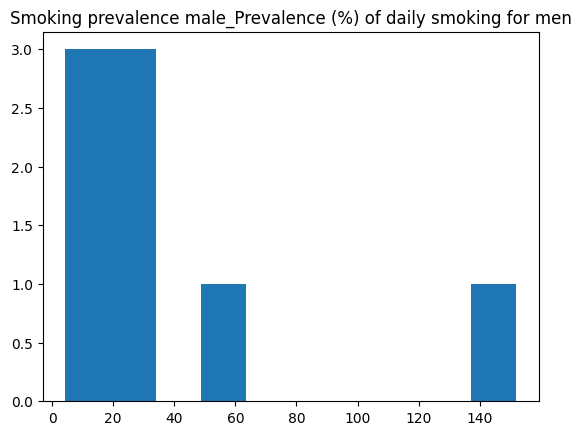

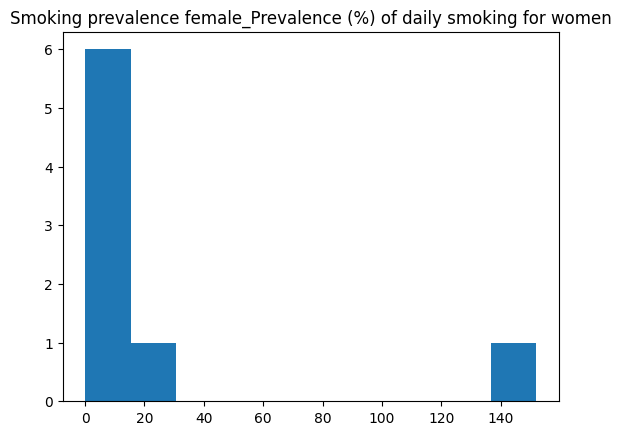

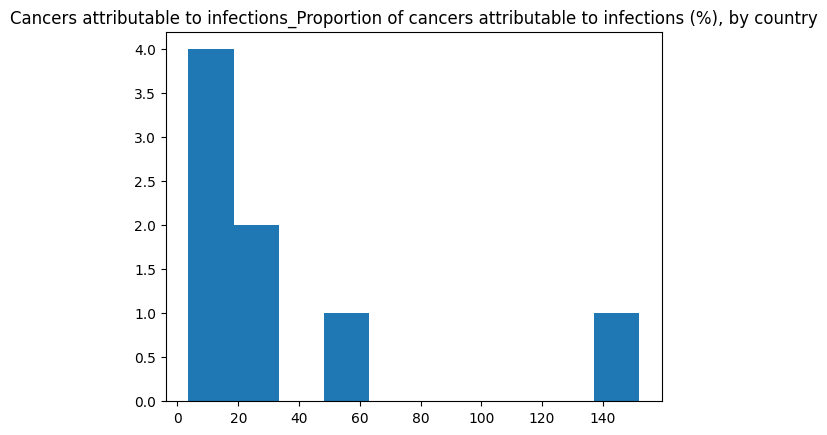

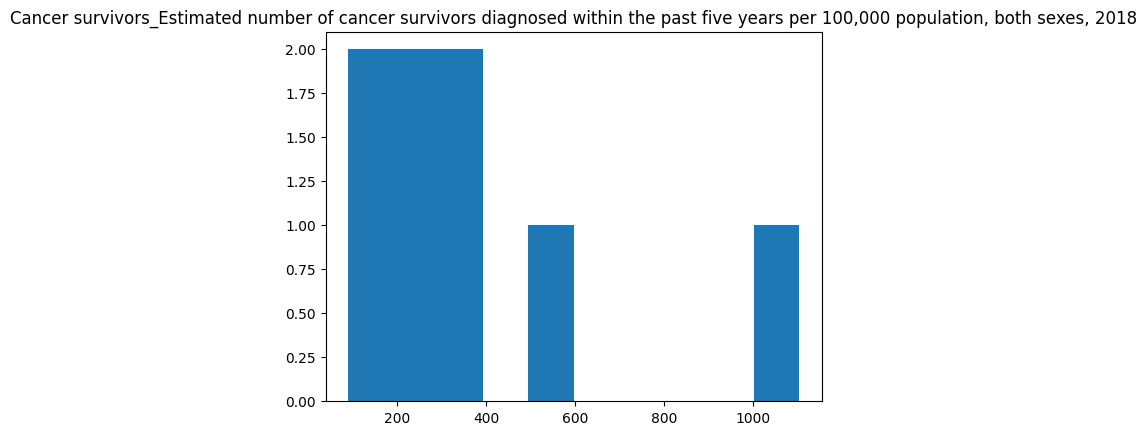

In [ ]:
# Using dataframe summary_stats_no_outliers:

# Create a histogram for each column in the dataframe
import matplotlib.pyplot as plt
for column in summary_stats_no_outliers.columns:
    plt.figure()
    plt.hist(summary_stats_no_outliers[column])
    plt.title(column)
    plt.show()


In [ ]:
# Visualize histograms for each numeric column after removing outliers
plt.figure(figsize=(16, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(cleaned_df_no_outliers[column], kde=True)
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()


Before removing outliers, the dataset had 172 rows and 10 columns. After removing outliers, it contains 152 rows and 10 columns.

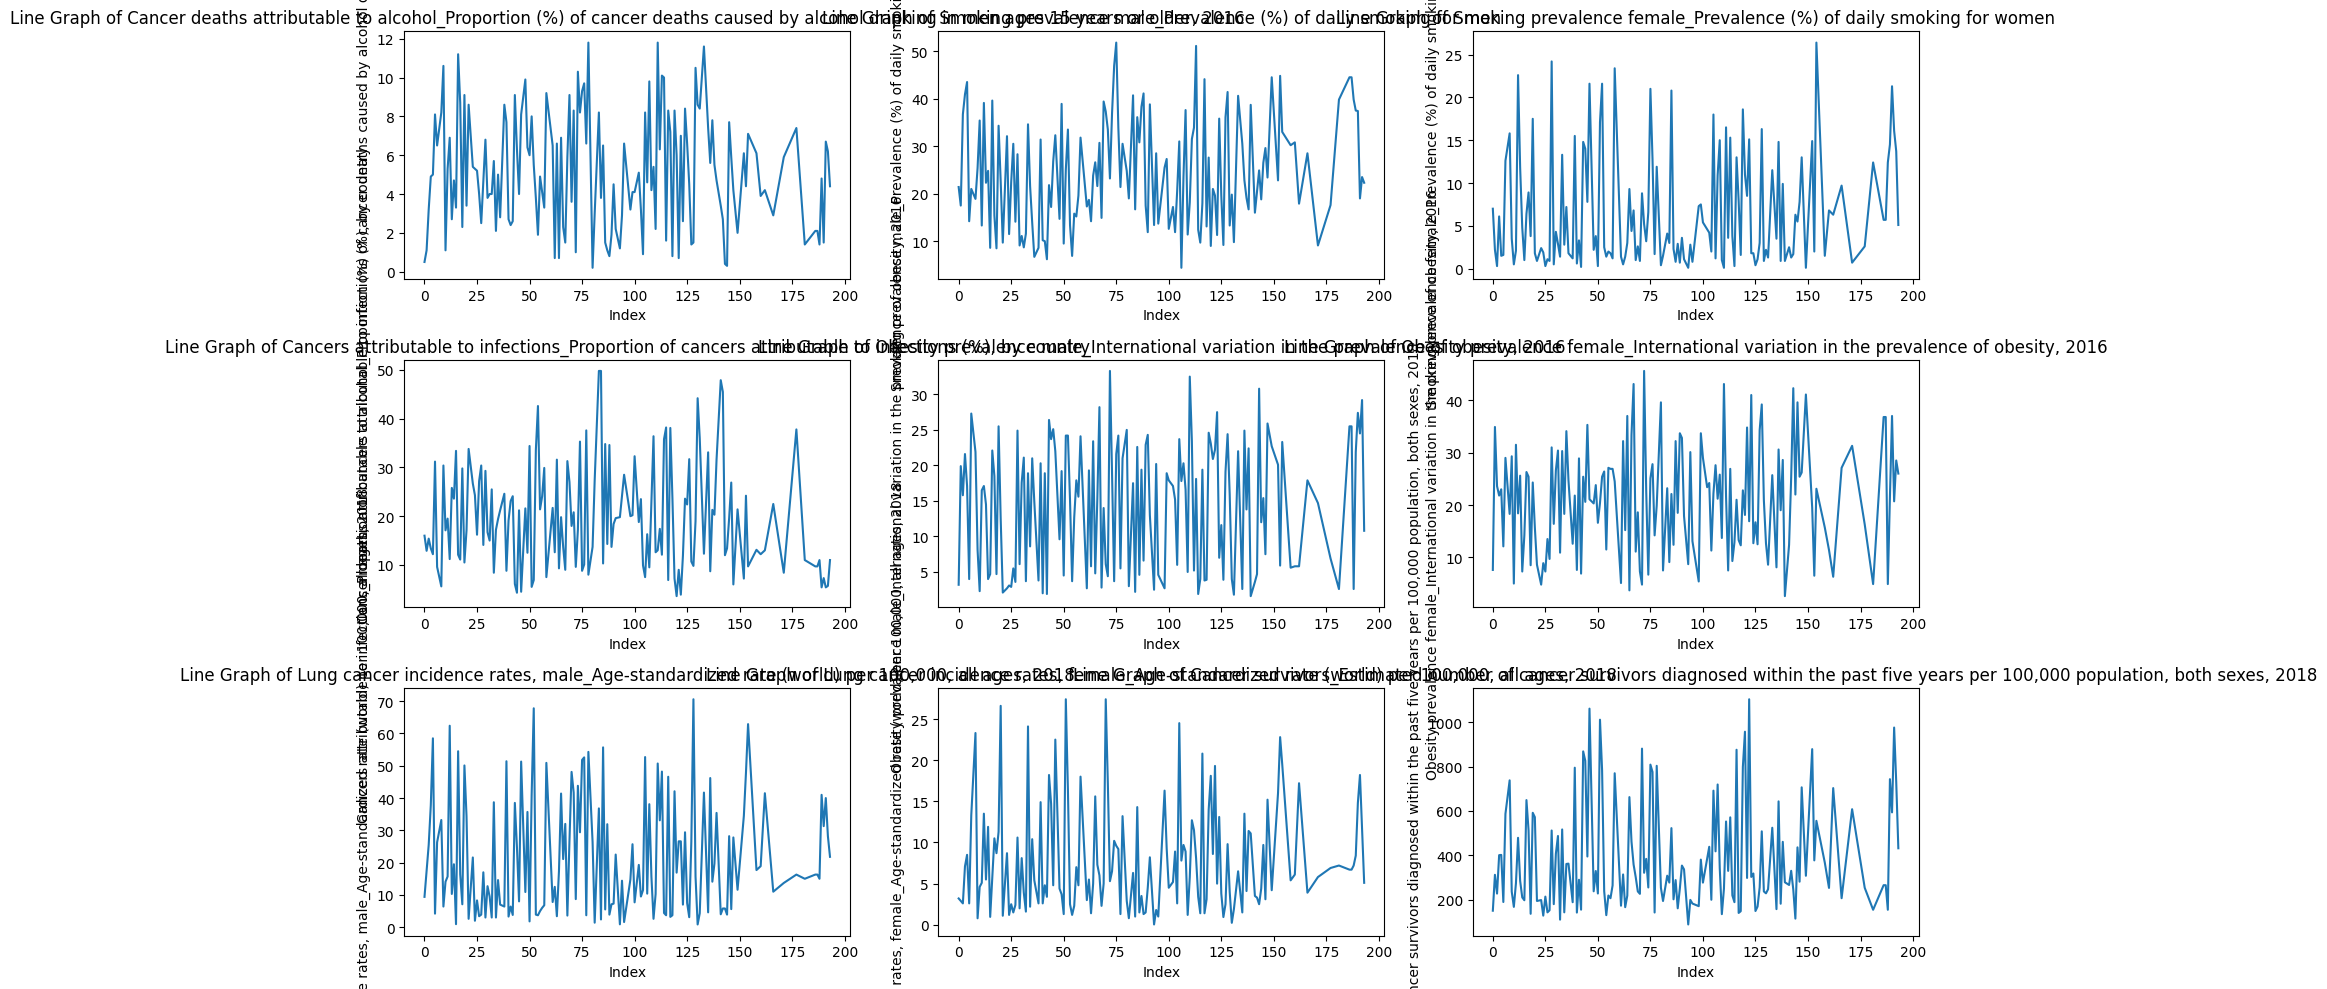

In [ ]:
# Plot line graphs for each numeric column after removing outliers
plt.figure(figsize=(16, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    plt.plot(cleaned_df_no_outliers[column])
    plt.title(f'Line Graph of {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
plt.tight_layout()
plt.show()


In [ ]:
# Check data types of each column
print(cleaned_df_no_outliers.dtypes)


Country or Territory                                                                                                                     object
Cancer deaths attributable to alcohol_Proportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016    float64
Smoking prevalence male_Prevalence (%) of daily smoking for men                                                                         float64
Smoking prevalence female_Prevalence (%) of daily smoking for women                                                                     float64
Cancers attributable to infections_Proportion of cancers attributable to infections (%), by country                                     float64
Obesity prevalence male_International variation in the prevalence of obesity, 2016                                                      float64
Obesity prevalence female_International variation in the prevalence of obesity, 2016                                                    

In [ ]:
# Drop the 'Country or Territory' column
cleaned_df_no_outliers_numeric = cleaned_df_no_outliers.drop(columns=['Country or Territory'])

# Explore correlations between different health indicators and cancer rates
correlation_matrix = cleaned_df_no_outliers_numeric.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Health Indicators and Cancer Rates')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Split the data into features (X) and target variable (y)
X = cleaned_df_no_outliers_numeric.drop(columns=['Cancer survivors_Estimated number of cancer survivors diagnosed within the past five years per 100,000 population, both sexes, 2018'])
y = cleaned_df_no_outliers_numeric['Cancer survivors_Estimated number of cancer survivors diagnosed within the past five years per 100,000 population, both sexes, 2018']

# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Fit the model
rf_regressor.fit(X, y)

# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Scores')
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Perform cross-validation
cv_scores = cross_val_score(rf_regressor, X, y, cv=5, scoring='neg_mean_absolute_error')

# Convert scores to positive values
cv_scores = -cv_scores

# Calculate mean and standard deviation of MAE scores
mean_mae = cv_scores.mean()
std_mae = cv_scores.std()

# Fit the model to get predictions
rf_regressor.fit(X, y)
y_pred = rf_regressor.predict(X)

# Calculate MSE, MAE, and R-squared
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r_squared = r2_score(y, y_pred)

# Print evaluation metrics
print("Cross-Validation Mean MAE:", mean_mae)
print("Cross-Validation MAE Standard Deviation:", std_mae)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r_squared)


Cross-Validation Mean MAE: 76.65606215053768
Cross-Validation MAE Standard Deviation: 18.17980476944228
Mean Squared Error (MSE): 1104.1957895723708
Mean Absolute Error (MAE): 24.128151315789495
R-squared: 0.9803639964771879


The results reveal the model's effectiveness in forecasting the number of cancer survivors per 100,000 population, based on various health indicators. The mean absolute error (MAE) of approximately 24.13 implies that, on average, the model's predictions deviate by about 24.13 from the actual values. The mean squared error (MSE) of 1104.20 indicates the average squared difference between predicted and actual values. Additionally, the high R-squared value of 0.98 suggests that the model captures approximately 98.04% of the variance in the target variable. Cross-validation further confirms the stability of the model's performance, with a mean MAE of approximately 76.66 and a standard deviation of 18.18.

In [ ]:
from sklearn.feature_selection import RFE

# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Initialize RFE
rfe = RFE(estimator=rf_regressor, n_features_to_select=5)

# Fit RFE
rfe.fit(X, y)

# Get selected feature indices
selected_indices = rfe.support_

# Get selected feature names
selected_features = X.columns[selected_indices]

# Print selected features
print("Selected Features:", selected_features)


Selected Features: Index(['Smoking prevalence female_Prevalence (%) of daily smoking for women',
       'Cancers attributable to infections_Proportion of cancers attributable to infections (%), by country',
       'Obesity prevalence female_International variation in the prevalence of obesity, 2016',
       'Lung cancer incidence rates, male_Age-standardized rate (world) per 100,000, all ages, 2018',
       'Lung cancer incidence rates, female_Age-standardized rate (world) per 100,000, all ages, 2018'],
      dtype='object')


The selected features are:

Smoking prevalence female (Prevalence (%) of daily smoking for women)
Cancers attributable to infections (Proportion of cancers attributable to infections (%), by country)
Obesity prevalence female (International variation in the prevalence of obesity, 2016)
Lung cancer incidence rates, male (Age-standardized rate (world) per 100,000, all ages, 2018)
Lung cancer incidence rates, female (Age-standardized rate (world) per 100,000, all ages, 2018)
These features were chosen as the most important predictors of cancer survivors based on their impact as determined by Recursive Feature Elimination with a Random Forest Regressor.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Define models
models = {
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regression': SVR(),
    'Neural Network': MLPRegressor()
}

# Define hyperparameters grid for tuning
param_grid = {
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5]},
    'Support Vector Regression': {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10]},
    'Neural Network': {'hidden_layer_sizes': [(50,), (100,), (100, 50)], 'activation': ['relu', 'tanh']}
}

# Perform grid search for each model
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X, y)
    best_models[name] = grid_search.best_estimator_

# Evaluate best models
for name, model in best_models.items():
    print(f"Best {name} Model Parameters: {model.get_params()}")


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best Gradient Boosting Model Parameters: {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Best Support Vector Regression Model Parameters: {'C': 1, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Best Neural Network Model Parameters: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Define the parameter grids for grid search
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2]
}

param_grid_svr = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}

# Perform grid search for each model
grid_search_gb = GridSearchCV(GradientBoostingRegressor(), param_grid_gb, cv=5)
grid_search_svr = GridSearchCV(SVR(), param_grid_svr, cv=5)
grid_search_nn = GridSearchCV(MLPRegressor(max_iter=200), param_grid_nn, cv=5)

# Fit the models
grid_search_gb.fit(X, y)
grid_search_svr.fit(X, y)
grid_search_nn.fit(X, y)

# Get the best parameters
best_params_gb = grid_search_gb.best_params_
best_params_svr = grid_search_svr.best_params_
best_params_nn = grid_search_nn.best_params_

print("Best Gradient Boosting Model Parameters:", best_params_gb)
print("Best Support Vector Regression Model Parameters:", best_params_svr)
print("Best Neural Network Model Parameters:", best_params_nn)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best Gradient Boosting Model Parameters: {'learning_rate': 0.1, 'n_estimators': 300}
Best Support Vector Regression Model Parameters: {'C': 0.1, 'kernel': 'linear'}
Best Neural Network Model Parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 100)}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# Example data loading (replace with your actual data)
# df = pd.read_csv('your_data.csv')
# X = df.drop(columns=['target_column'])
# y = df['target_column']

# Generating example data
# Remove this part and use your actual data loading method
np.random.seed(0)
X = np.random.rand(100, 10)
y = np.random.rand(100)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [(100, 100), (200, 200)],  # Example: Try different architectures
    'activation': ['relu', 'tanh'],                 # Example: Try different activation functions
    'alpha': [0.001, 0.01],                         # Example: Adjust regularization strength
    'max_iter': [500, 1000],                        # Increase maximum number of iterations
}

# Create MLPRegressor
mlp = MLPRegressor()

# Grid search with cross-validation
grid_search = GridSearchCV(mlp, param_grid, cv=5, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Neural Network Model Parameters:", best_params)

# Retrain the model with the best parameters
best_mlp = MLPRegressor(**best_params)
best_mlp.fit(X_train, y_train)

# Optionally, evaluate the model on the test set
test_score = best_mlp.score(X_test, y_test)
print("Test set score:", test_score)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=500; total time=   0.6s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=500; total time=   0.9s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=500; total time=   0.7s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=500; total time=   0.5s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=500; total time=   0.7s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=1000; total time=   0.8s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=1000; total time=   0.9s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=1000; total time=   0.7s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=1000; total time=   0.7s
[CV] END

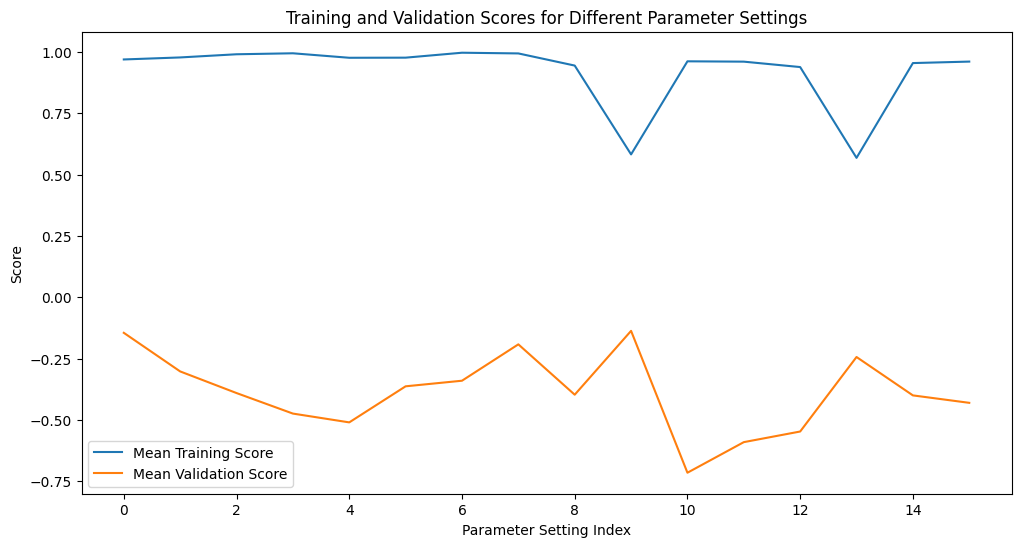

In [ ]:
# Visualization
# 1. Plotting training vs validation scores during grid search
results = pd.DataFrame(grid_search.cv_results_)
mean_train_scores = results['mean_train_score']
mean_test_scores = results['mean_test_score']

plt.figure(figsize=(12, 6))
plt.plot(mean_train_scores, label='Mean Training Score')
plt.plot(mean_test_scores, label='Mean Validation Score')
plt.xlabel('Parameter Setting Index')
plt.ylabel('Score')
plt.title('Training and Validation Scores for Different Parameter Settings')
plt.legend()
plt.show()


In [ ]:

# 2. Plotting predictions vs actual values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()




In [ ]:
# 3. Plotting the residuals
residuals = y_test - y_pred
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals, edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()